Problem Statement: Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection and processing

```
# This is formatted as code
```



In [81]:
#load test.csv file in pandas dataframe
titanic_data = pd.read_csv('/content/tested.csv')

In [82]:
#print the 5 rows of data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
#number of rows and columns
titanic_data.shape

(418, 12)

In [84]:
#gettiing data info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [85]:
#check no of missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

handling missing values

In [86]:
#replacing cabin colunm  values
titanic_data.drop(columns=['Cabin'], inplace=True)


In [87]:
#replace missing age with mean age
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [88]:
#finding mode to replace missing value for fare
print(titanic_data['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [89]:
print(titanic_data['Fare'].mode()[0])

7.75


In [90]:
#replace null value in fare
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0],inplace=True)

In [91]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data analysis and plotting

In [92]:
#statistical measures for data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [93]:
#finding no of people survived or not
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Data visualisation

In [94]:
sns.set()

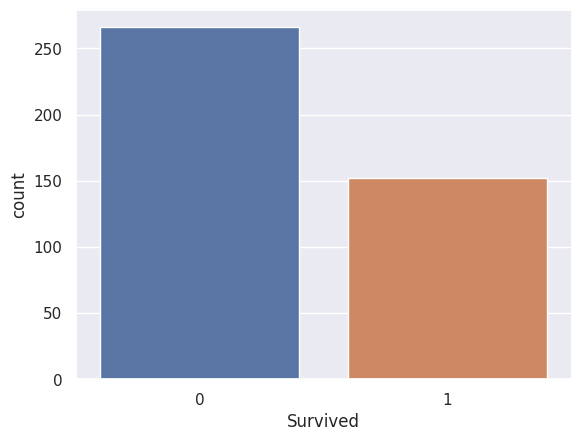

In [95]:
#count plot for survived column
sns.countplot(x='Survived', data=titanic_data)
mpb.show()

In [96]:
#finding no of male and female
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

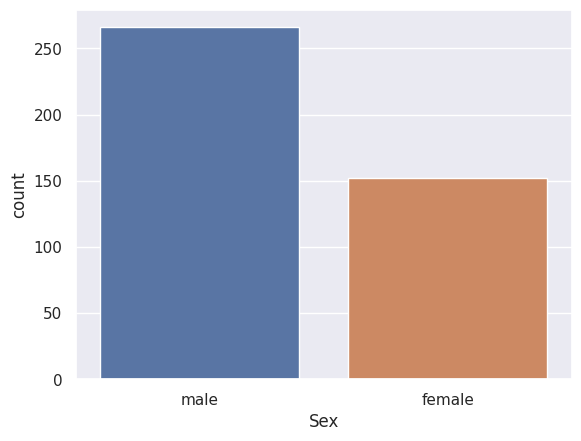

In [97]:
#count plot for sex column
sns.countplot(x='Sex', data=titanic_data)
mpb.show()

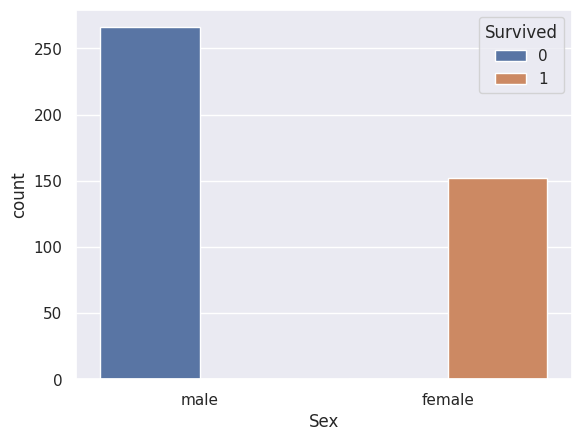

In [98]:
#number of survivers based on sex
sns.countplot(x='Sex',hue='Survived',data=titanic_data)
mpb.show()

In [99]:
# Assuming 'Sex' and 'Survived' are columns in the 'titanic_data' DataFrame
males_survived = titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Survived'] == 1)].shape[0]
print("Number of males who survived:", males_survived)

Number of males who survived: 0


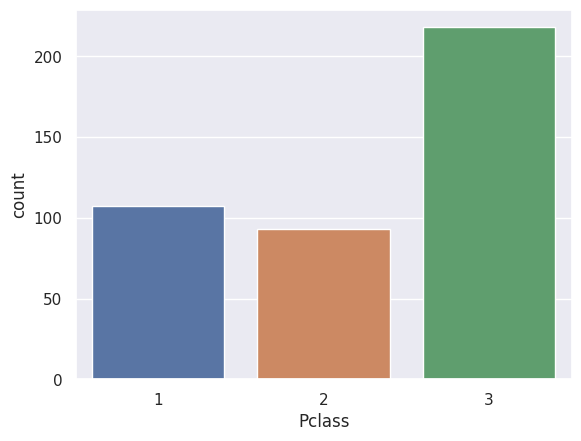

In [100]:
#count plot for passenger class column
sns.countplot(x='Pclass', data=titanic_data)
mpb.show()

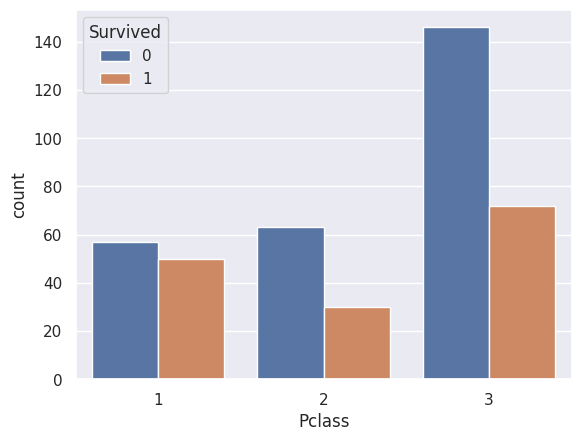

In [101]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)
mpb.show()

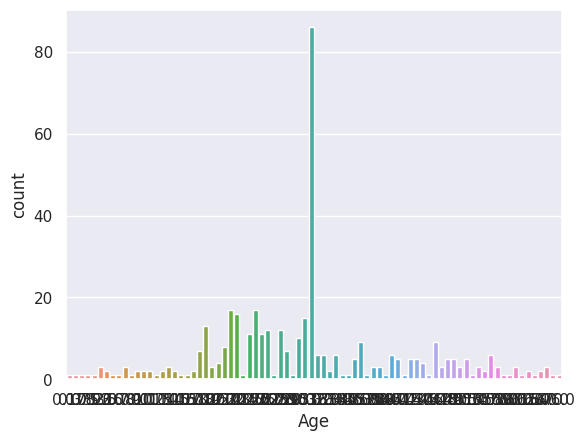

In [102]:
sns.countplot(x='Age', data=titanic_data)
mpb.show()

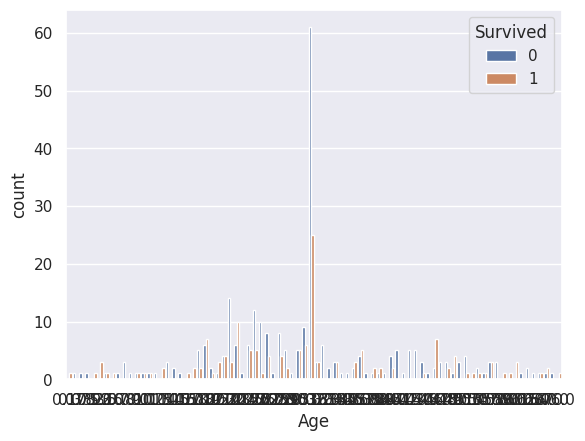

In [103]:
sns.countplot(x='Age',hue='Survived',data=titanic_data)
mpb.show()

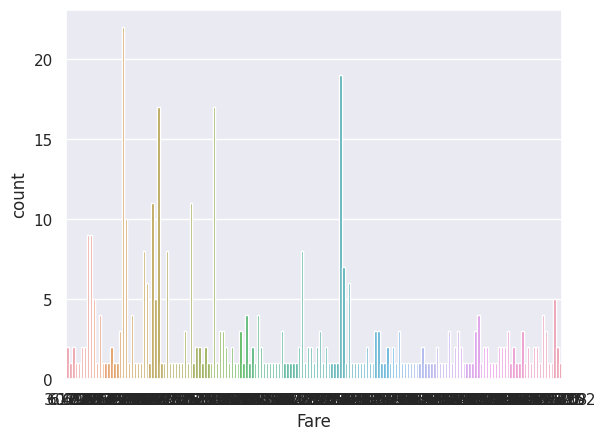

In [104]:
sns.countplot(x='Fare', data=titanic_data)
mpb.show()

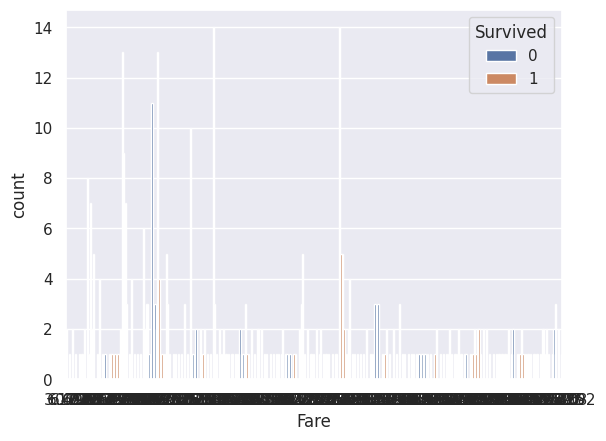

In [105]:
sns.countplot(x='Fare', hue='Survived', data=titanic_data)
mpb.show()

Encoding categorical column

In [106]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [107]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [108]:
#convert categorical column into numerical values
titanic_data['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [109]:
titanic_data['Embarked'].replace({'S': 0, 'C': 1,'Q':2}, inplace=True)

In [110]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


separate the features with target

In [113]:
X=titanic_data.drop(columns=['Survived','PassengerId','Name','Ticket'],axis=1)
Y=titanic_data['Survived']

In [114]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [115]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


split data into test data and raining data

In [127]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [128]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [129]:
print(Y.shape,Y_train.shape,Y_test.shape)

(418,) (334,) (84,)


Model Training

Logistic Regression

In [130]:
model = LogisticRegression()

In [131]:
#training the model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evalation

Accuracy Score

In [132]:
#accuracy prediction on training data
X_train_predict = model.predict(X_train)
print(X_train_predict)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0
 1]


In [133]:
Accuracy_train = accuracy_score(Y_train, X_train_predict)
print('The accuracy of data is:', Accuracy_train)

The accuracy of data is: 1.0


In [134]:
#accuracy prediction on test data
X_test_predict = model.predict(X_test)
print(X_test_predict)

[0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0]


In [135]:
Y_Accuracy_test = accuracy_score(Y_test, X_test_predict)
print('The accuracy of data is:', Y_Accuracy_test)

The accuracy of data is: 1.0
